In [1]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
import pandas as pd

In [2]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20240914_140037.braidz")

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20240914_140037.braidz using pyarrow


In [3]:
df,csvs["opto"]

(          obj_id    frame     timestamp         x         y         z  \
 0              0    81052  1.726316e+09 -0.231074  0.058334 -0.001094   
 1              0    81053  1.726316e+09 -0.231131  0.058301 -0.001149   
 2              0    81054  1.726316e+09 -0.231201  0.058196 -0.001512   
 3              0    81055  1.726316e+09 -0.231218  0.058308 -0.001317   
 4              0    81056  1.726316e+09 -0.231264  0.058361 -0.001259   
 ...          ...      ...           ...       ...       ...       ...   
 10034206  158968  8304464  1.726398e+09 -0.088346  0.138549 -0.004171   
 10034207  158968  8304465  1.726398e+09 -0.088362  0.138538 -0.004165   
 10034208  158968  8304466  1.726398e+09 -0.088369  0.138552 -0.004181   
 10034209  158968  8304467  1.726398e+09 -0.088361  0.138548 -0.004198   
 10034210  158968  8304468  1.726398e+09 -0.088382  0.138558 -0.004214   
 
               xvel      yvel      zvel           P00           P01  \
 0        -0.001038  0.000621 -0.000593

In [4]:
data = extract_stimulus_centered_data(df, csvs["opto"])

In [5]:
median_obj_id = filtering.filter_by_median_position(df, xlim=[-0.2, 0.2], ylim=[-0.2, 0.2], zlim=[0.1, 0.3])
duration_obj_id = filtering.filter_by_duration(df, threshold=5)

shared_elements = set(median_obj_id) & set(duration_obj_id)
shared_elements

{684,
 1465,
 1887,
 1961,
 2639,
 2879,
 3081,
 3082,
 3316,
 4521,
 4827,
 4910,
 5492,
 5602,
 5979,
 8494,
 13783,
 18636,
 24919,
 31867,
 33724,
 41591,
 75324,
 107489,
 114976,
 143616,
 143693,
 151915,
 154134,
 156254,
 156265,
 158456,
 158794}

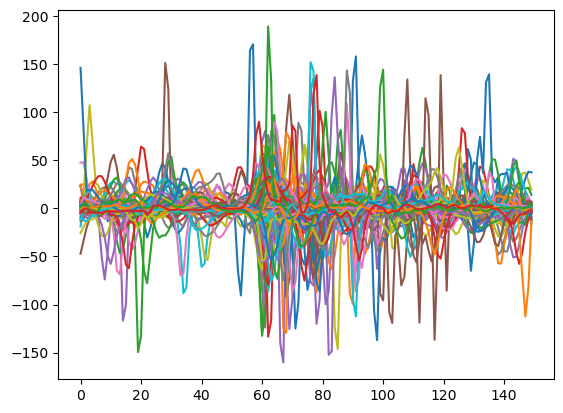

In [6]:
fig = plt.figure()
for d in data["angular_velocity"]:
    plt.plot(d)
plt.show()

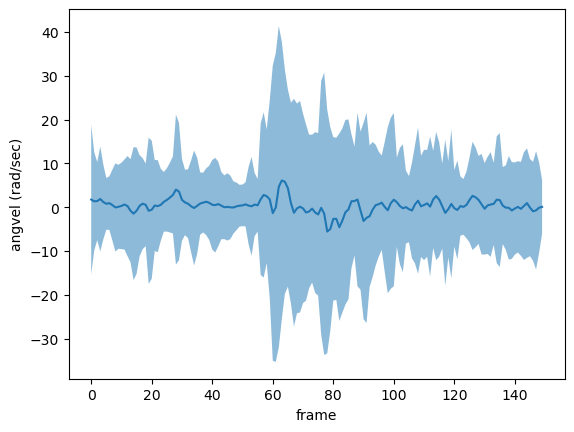

In [7]:
fig, ax = plt.subplots()
plot_mean_and_std(np.array(data["angular_velocity"]), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

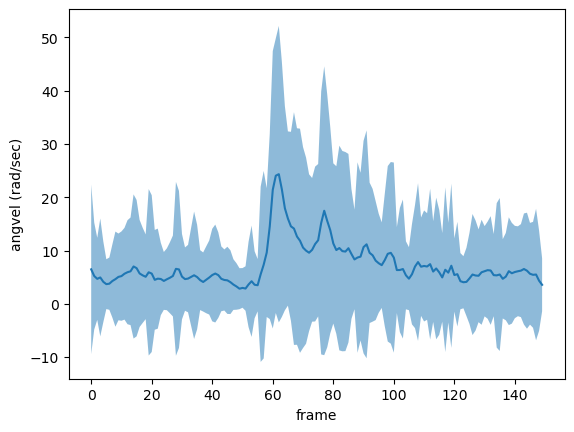

In [8]:
fig, ax = plt.subplots()
plot_mean_and_std(np.abs(np.array(data["angular_velocity"])), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

<Axes: >

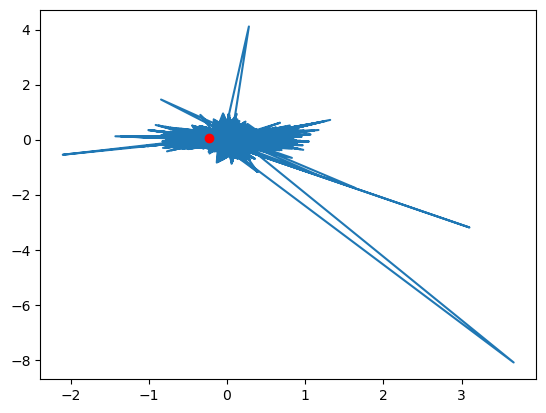

In [9]:
plot_trajectory(df)

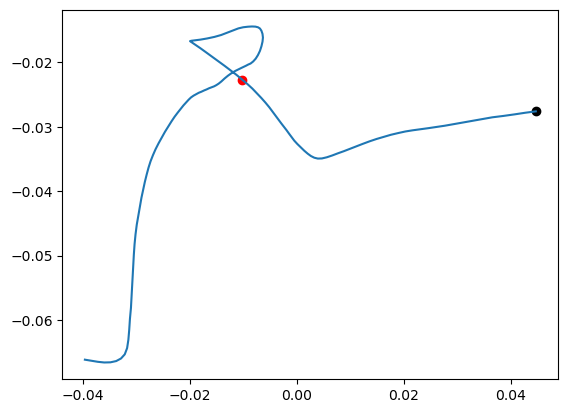

In [10]:
i = 7
traj = data["position"][i]

fig = plt.figure()
plt.plot(traj[:,0], traj[:,1])
plt.scatter(traj[50,0], traj[50,1], color="red")
plt.scatter(traj[0,0], traj[0,1], color="black")
plt.show()

In [11]:
data1_max = np.max(np.abs(np.asarray(data["angular_velocity"])[:, 50:80]), axis=1)

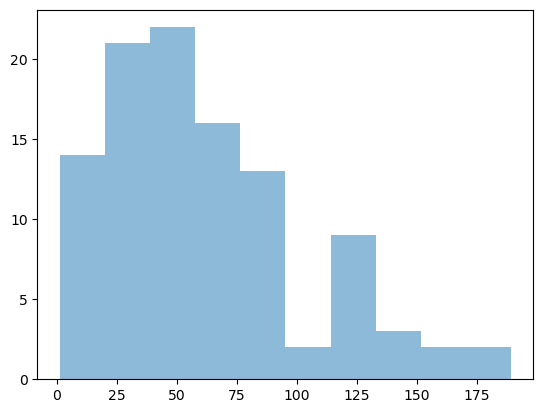

In [12]:
plt.figure()
plt.hist(data1_max, alpha=0.5)
plt.show()

In [13]:
mean_data = np.mean(data1_max)
print(mean_data)
std_dev = np.std(data1_max, ddof=1)  
std_error = std_dev / np.sqrt(len(data1_max))
print(f"Standard Deviation of data1_max: {std_dev:.4f}")
print(f"Standard Error of data1_max: {std_error:.4f}")

61.537059847543674
Standard Deviation of data1_max: 41.6781
Standard Error of data1_max: 4.0869


In [14]:
print(f"Shape of data1_max: {data1_max.shape}")
flattened_data = data1_max.ravel()
print(f"Shape of flattened data: {flattened_data.shape}")
k2, p_value = stats.normaltest(flattened_data)
print(f"D'Agostino's K-squared Test Statistic: {k2}")
print(f"P-value: {p_value}")

Shape of data1_max: (104,)
Shape of flattened data: (104,)
D'Agostino's K-squared Test Statistic: 10.706430850070046
P-value: 0.004732908194998248
